In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

#### 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last 
contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




In [2]:
# Link for details about dataset
# http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
df = pd.read_csv('bank-1.csv')


In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
df['contact'].unique()

array(['cellular', 'telephone', nan], dtype=object)

In [6]:
df['poutcome'].unique()

array(['failure', 'other', 'success', nan], dtype=object)

There are NaN instances in the data like poutcome and contact

#### B.1. Quick Examination of Numerical Attributes


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Age column is missing 2 entries. Other columns are populated with all data.

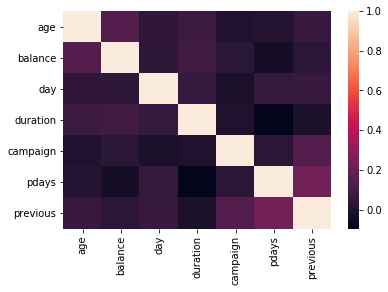

In [8]:
sns.heatmap(df.corr())

There is no significant corelation found in the dataset. But, **previous** column shows a little correlation with **pdays** and **campaign**

### details
**previous** - number of contacts performed before this campaign and for this client<br>
**pdays**    - number of days that passed by after the client was last contacted from a previous campaign<br>
**campaign** - number of contacts performed during this campaign and for this client<br>

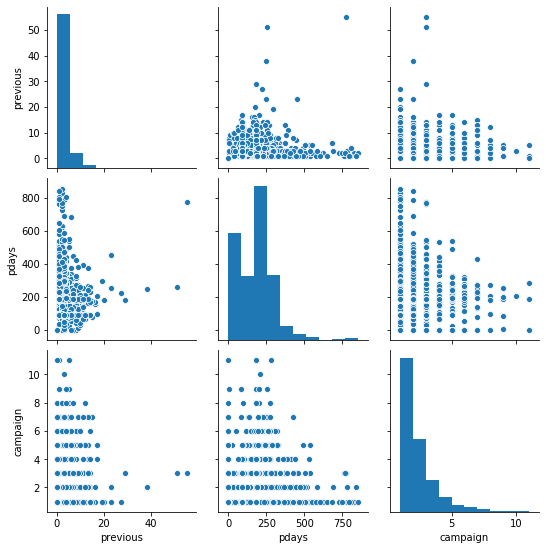

In [9]:
sns.pairplot(data=df[['previous', 'pdays', 'campaign']].dropna())
plt.show()

Trying pairplot on the fields with no correlation

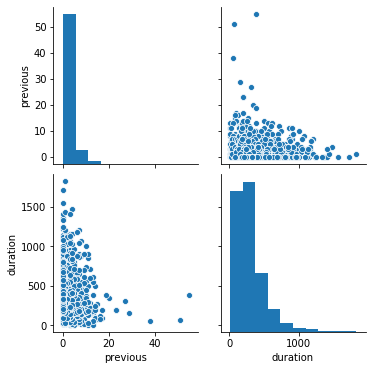

In [10]:
sns.pairplot(data=df[['previous', 'duration']].dropna())
plt.show()

#### B.2. Quick Examination of Categorical Attributes

In [11]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [12]:
total_number_of_columns  = 2000
total_categorical_column = 1663+146
missing_categorical_column = total_number_of_columns - total_categorical_column
missing_categorical_column

191

In [13]:
print(len(df['contact']))
print(df['contact'].count())
len(df['contact']) - df['contact'].count()

2000
1809


191

## C. Distribution Analysis for Numerical Atributes

Text(0.5, 0, 'balance')

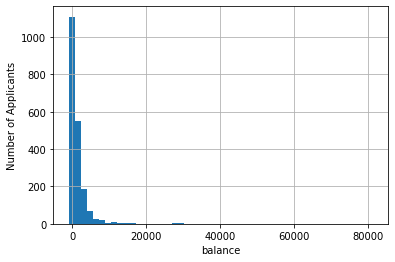

In [14]:
df['balance'].hist(bins=50)
plt.ylabel('Number of Applicants')
plt.xlabel('balance')

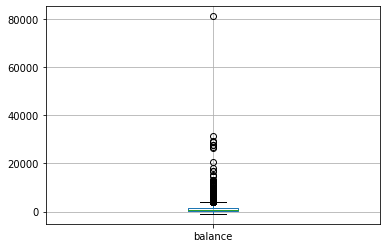

In [15]:
df.boxplot(column='balance')

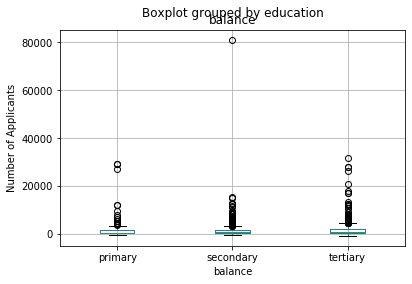

In [16]:
df.boxplot(column='balance', by='education')
plt.xlabel('balance')
plt.ylabel('Number of Applicants')
plt.show()

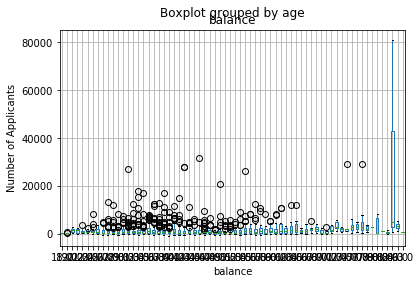

In [17]:
df.boxplot(column='balance', by='age')
plt.xlabel('balance')
plt.ylabel('Number of Applicants')
plt.show()

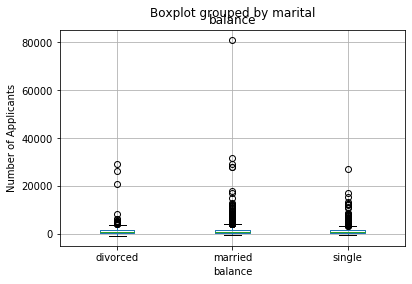

In [18]:
df.boxplot(column='balance', by='marital')
plt.xlabel('balance')
plt.ylabel('Number of Applicants')
plt.show()

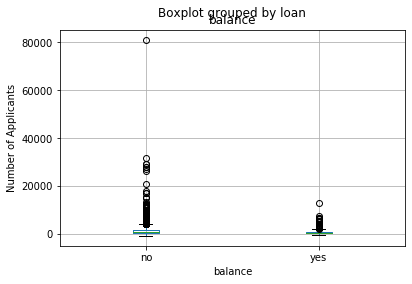

In [19]:
df.boxplot(column='balance', by='loan')
plt.xlabel('balance')
plt.ylabel('Number of Applicants')
plt.show()

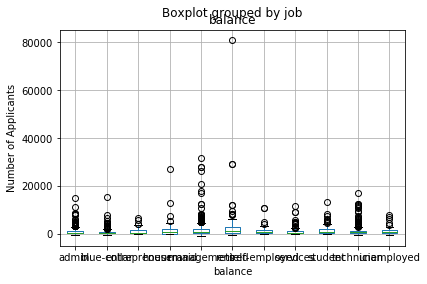

In [20]:
df.boxplot(column='balance', by='job')
plt.xlabel('balance')
plt.ylabel('Number of Applicants')
plt.show()

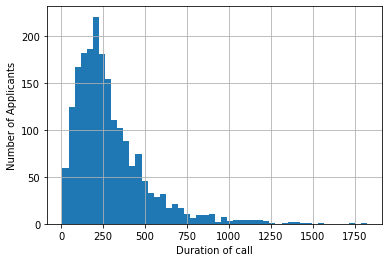

In [21]:
df['duration'].hist(bins=50)
plt.xlabel("Duration of call")
plt.ylabel('Number of Applicants')
plt.show()

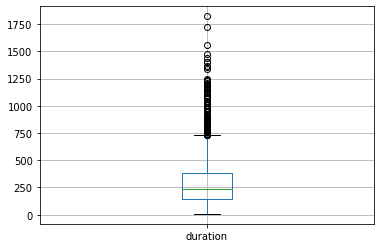

In [22]:
# Boxp lot of LoanAmount
df.boxplot(column='duration')
plt.show()

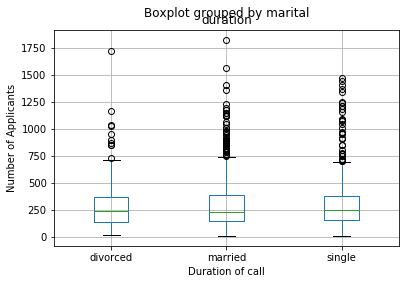

In [23]:
df.boxplot(column='duration', by='marital')
plt.xlabel('Duration of call')
plt.ylabel('Number of Applicants')
plt.show()

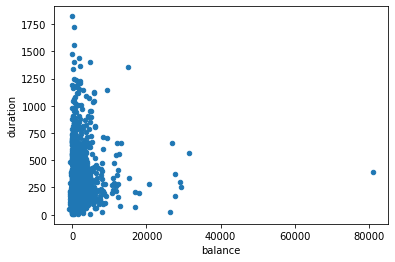

In [24]:
df.plot.scatter(x='balance', y='duration')
plt.show()

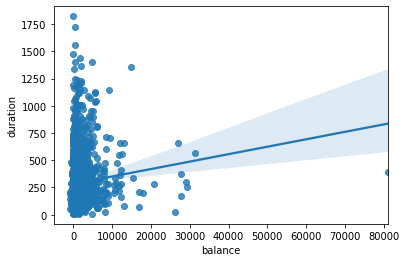

In [25]:
sns.regplot(data=df, x='balance', y='duration')
plt.show()

## D. Box Plot Variations

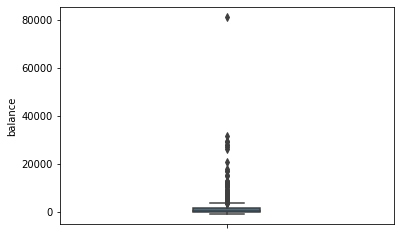

In [26]:
#First, let's draw a seaborn-style box plot for balance

sns.boxplot(x=df['balance'], orient='v', width=0.2)
plt.show()

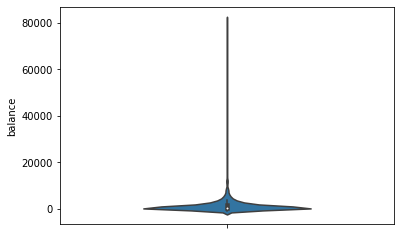

In [27]:
#Violin plot for balance

sns.violinplot(x=df['balance'], orient='v', width=0.5)
plt.show()

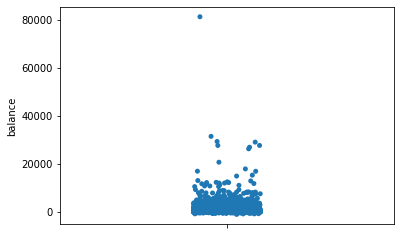

In [28]:
#Strip plot for balance

sns.stripplot(x=df['balance'], jitter=True, orient='v')
plt.show()

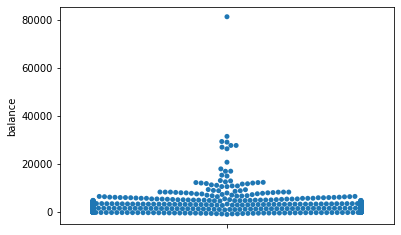

In [29]:
#Swar mplot for balance

sns.swarmplot(x=df['balance'], orient='v')
plt.show()

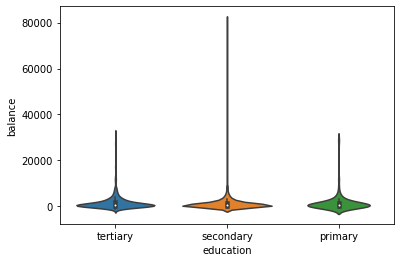

In [30]:
sns.violinplot(data=df, x='education', y='balance')
plt.show()

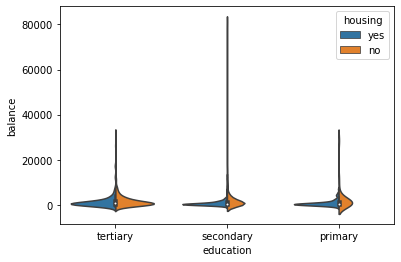

In [35]:
sns.violinplot(data=df, x='education', y='balance', hue='housing', split=True)
plt.show()

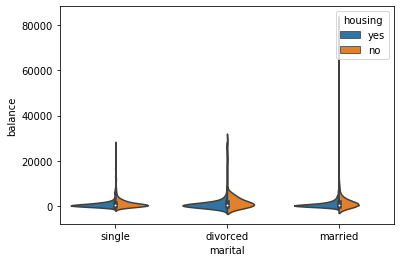

In [36]:
sns.violinplot(data=df, x='marital', y='balance', hue='housing', split=True)
plt.show()

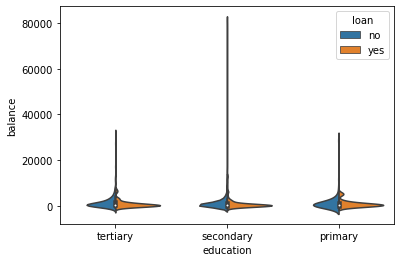

In [37]:
sns.violinplot(data=df, x='education', y='balance', hue='loan', split=True)
plt.show()

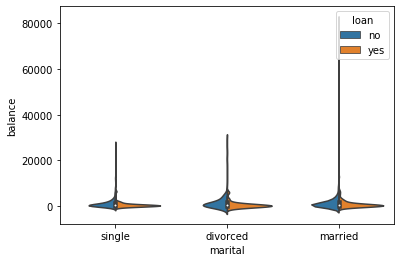

In [38]:
sns.violinplot(data=df, x='marital', y='balance', hue='loan', split=True)
plt.show()

## E. Distribution Analysis for Categorical Attributes

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [41]:
ndf = df.copy()

In [53]:
ndf = ndf.replace(to_replace = ['yes' , 'no'],value = ['1','0'])
ndf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,0,392,1,0,cellular,1,apr,957,2,131,2,failure,0
1,39.0,technician,divorced,secondary,0,688,1,1,cellular,1,apr,233,2,133,1,failure,0
2,59.0,retired,married,secondary,0,1035,1,1,cellular,1,apr,126,2,239,1,failure,0
3,47.0,blue-collar,married,secondary,0,398,1,1,cellular,1,apr,274,1,238,2,failure,0
4,54.0,retired,married,secondary,0,1004,1,0,cellular,1,apr,479,1,307,1,failure,0


In [74]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for Credit History:') 
print(frequency_table)

Frequency Table for Credit History:
yes     250
no     1750
Name: loan, dtype: int64


In [82]:
pivot_table_LC = df.pivot_table(values='subscribed',
                                index='loan', aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
                                

In [83]:
# Print pivot table
print(pivot_table_LC)

      subscribed
loan            
no      0.546857
yes     0.172000


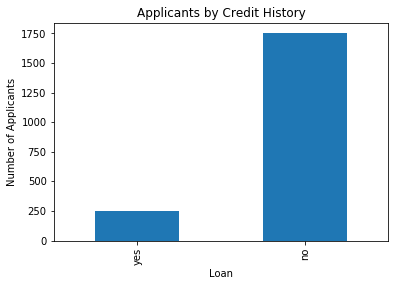

In [84]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Loan')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Credit History')
plt.show()

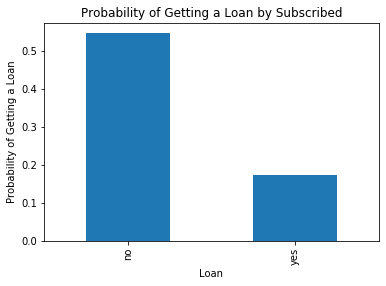

In [86]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('Loan')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Subscribed')
plt.legend().set_visible(False) # we don't need the default legend

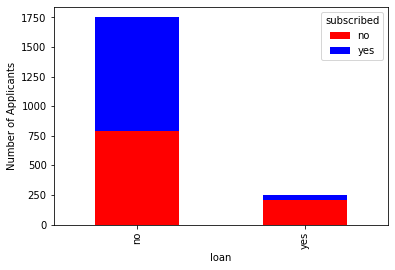

In [91]:
crosstab_CL = pd.crosstab(df['loan'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

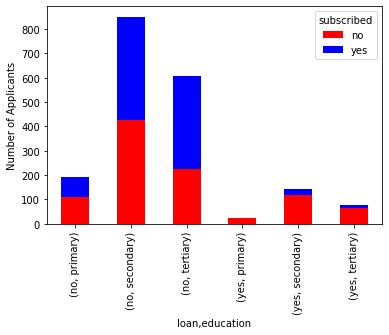

In [98]:
crosstab_CGL = pd.crosstab([df['loan'], df['education']], df['subscribed'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

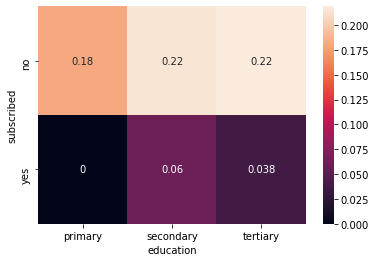

In [100]:
pivot_table_LCG = df.pivot_table(values='loan', 
                           index='subscribed', 
                           columns='education',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()